# Part I - Exploring Prosper Loan Data

## Introduction
> "This data set contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others." [1] 
>
>"Prosper was founded in 2005 as the first peer-to-peer lending marketplace in the United States. Since then, Prosper has facilitated more than $20 billion in loans to more than 1,170,000 people."[2]


## Wrangling



In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
from pandas.api.types import CategoricalDtype

# plotting
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline
from matplotlib import rcParams

# working with date/time dtypes
import datetime as dt

# generating combinations
from itertools import product

# setting random seed
np.random.seed(2018)

## Wrangling - Gathering

In [2]:
# load data
df = pd.read_csv('prosperLoanData.csv')

## Wrangling - Assessing (High-level)

In [3]:
# display high-level info on data
print(f'Total nulls in data: {df.isnull().sum().sum()}')
print(f'Duplicate records: {df.duplicated().sum()}\n')
print(df.info())

Total nulls in data: 1364086
Duplicate records: 0

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield      

In [4]:
# find variables with no nulls...could be important/mandatory data!
df.isnull().sum()[df.isnull().sum() == 0]

ListingKey                         0
ListingNumber                      0
ListingCreationDate                0
Term                               0
LoanStatus                         0
BorrowerRate                       0
LenderYield                        0
ListingCategory (numeric)          0
IsBorrowerHomeowner                0
CurrentlyInGroup                   0
DateCreditPulled                   0
OpenRevolvingAccounts              0
OpenRevolvingMonthlyPayment        0
IncomeRange                        0
IncomeVerifiable                   0
StatedMonthlyIncome                0
LoanKey                            0
LoanCurrentDaysDelinquent          0
LoanMonthsSinceOrigination         0
LoanNumber                         0
LoanOriginalAmount                 0
LoanOriginationDate                0
LoanOriginationQuarter             0
MemberKey                          0
MonthlyLoanPayment                 0
LP_CustomerPayments                0
LP_CustomerPrincipalPayments       0
L

In [5]:
# check key/id columns for uniques / potential duplicates
print('Number of uniques (specific columns):')
print(f'"Listing Key" values: {df.ListingKey.nunique()}')
print(f'"Listing Number" values: {df.ListingNumber.nunique()}')
print(f'"Listing Creation Date" values: {df.ListingCreationDate.nunique()}')

Number of uniques (specific columns):
"Listing Key" values: 113066
"Listing Number" values: 113066
"Listing Creation Date" values: 113064


In [6]:
# change max columns so we can see all columns in the sample below
pd.set_option("display.max_columns", 100)
df.sample(5)

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),BorrowerState,Occupation,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,CurrentlyInGroup,GroupKey,DateCreditPulled,CreditScoreRangeLower,CreditScoreRangeUpper,FirstRecordedCreditLine,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TotalTrades,TradesNeverDelinquent (percentage),TradesOpenedLast6Months,DebtToIncomeRatio,IncomeRange,IncomeVerifiable,StatedMonthlyIncome,LoanKey,TotalProsperLoans,TotalProsperPaymentsBilled,OnTimeProsperPayments,ProsperPaymentsLessThanOneMonthLate,ProsperPaymentsOneMonthPlusLate,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,ScorexChangeAtTimeOfListing,LoanCurrentDaysDelinquent,LoanFirstDefaultedCycleNumber,LoanMonthsSinceOrigination,LoanNumber,LoanOriginalAmount,LoanOriginationDate,LoanOriginationQuarter,MemberKey,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
3450,4A3833892986553962B1E18,133586,2007-05-06 19:45:37.160000000,D,36,Completed,2009-01-21 00:00:00,0.20735,0.2000,0.1900,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,Professional,Full-time,21.0,False,True,C9643379247860156A00EC0,2007-05-06 16:37:11.990000000,620.0,639.0,1996-05-08 00:00:00,6.0,6.0,9.0,5,95.0,2.0,3.0,0.0,0.0,5.0,0.0,0.0,4061.0,0.91,282.0,9.0,0.66,3.0,0.24,"$25,000-49,999",True,3980.500000,0D6E33894576394069B3A69,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,82,15044,15000,2007-05-16 00:00:00,Q2 2007,AFD733857551153836D57AC,557.45,18964.3600,15000.00,3964.3600,-198.23,0.0,0.00,0.00,0.0,1.0,2,0,0.0,241
103816,0E7235803273165563E0772,810109,2013-06-15 10:34:03.160000000,NaN,36,Completed,2013-11-20 00:00:00,0.29537,0.2566,0.2466,0.22540,0.1175,0.10790,3.0,D,3.0,1,PA,Nurse (RN),Employed,7.0,False,False,NaN,2013-06-15 10:33:47,660.0,679.0,1990-01-12 00:00:00,9.0,5.0,50.0,2,46.0,1.0,3.0,2.0,131.0,1.0,0.0,0.0,2486.0,0.31,5314.0,26.0,0.57,1.0,0.17,"$50,000-74,999",True,4166.666667,813036846224688915AB94B,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,9,93311,4000,2013-06-19 00:00:00,Q2 2013,4E033580314191529787348,160.44,4413.4979,4000.00,413.4979,-16.23,0.0,0.00,0.00,0.0,1.0,0,0,0.0,1
70633,E597359598907431039949F,1025296,2013-12-02 16:44:35.170000000,NaN,36,Current,NaN,0.14714,0.1189,0.1089,0.10446,0.0374,0.06706,6.0,A,6.0,1,MA,Other,Employed,84.0,False,False,NaN,2013-12-02 16:44:53,740.0,759.0,1988-03-01 00:00:00,17.0,16.0,28.0,17,573.0,1.0,9.0,0.0,0.0,0.0,0.0,0.0,17870.0,0.44,19976.0,26.0,1.00,1.0,0.34,"$25,000-49,999",True,4083.333333,C6E936993955527757F4C79,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,3,119454,12000,2013-12-06 00:00:00,Q4 2013,10913558501235629797546,397.94,791.9710,556.31,235.6610,-20.15,0.0,0.00,0.00,0.0,1.0,0,0,0.0,1
55747,AADC3586443120278F92DD5,876489,2013-08-22 07:49:47.263000000,NaN,36,Current,NaN,0.20053,0.1639,0.1539,0.14520,0.0574,0.08780,5.0,B,6.0,1,OR,Other,Other,141.0,True,False,NaN,2013-08-22 07:49:38,720.0,739.0,1964-07-01 00:00:00,9.0,9.0,25.0,7,699.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,30134.0,0.88,3618.0,25.0,0.96,0.0,0.51,"$25,000-49,999",True,2750.000000,0E953692184462288A350A6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,7,100669,10000,2013-08-29 00:00:00,Q3 2013,A3DD3587105020853EED6D0,353.50,2116.5096,1344.32,772.1896,-47.38,0.0,0.00,0.00,0.0,1.0,0,0,0.0,1
67600,DA3C35470155147378707C2,585279,2012-05-03 11:14:16.630000000,NaN,36,Chargedoff,2013-02-16 00

In [7]:
# determine timeframe of dataset
df.ListingCreationDate.min(), df.ListingCreationDate.max()

('2005-11-09 20:44:28.847000000', '2014-03-10 12:20:53.760000000')

In [8]:
# example of ordinal categorical variable
df.CreditGrade.unique()

array(['C', nan, 'HR', 'AA', 'D', 'B', 'E', 'A', 'NC'], dtype=object)

In [9]:
# example of nominal categorical variable, let's get each unique entry count...
df.LoanStatus.value_counts()

Current                   56576
Completed                 38074
Chargedoff                11992
Defaulted                  5018
Past Due (1-15 days)        806
Past Due (31-60 days)       363
Past Due (61-90 days)       313
Past Due (91-120 days)      304
Past Due (16-30 days)       265
FinalPaymentInProgress      205
Past Due (>120 days)         16
Cancelled                     5
Name: LoanStatus, dtype: int64

### What is the structure of your dataset?
>Observations from initial/cursory review:
>* A single large master dataset with ~114k rows by 81 columns.
>* Data from ~8yr period (Nov-2005 to Mar-2014).
>* Various `dtypes` (i.e. floats (continuous data), ints (discrete data), objects/strings, bool).
>* There are a numerous categorical `dtype` candidates (e.g. CreditGrade, ProsperRating, ProsperScore, LoanStatus, etc.).
>* Quality: The data looks to be fairly clean with the exception of some NaNs (of which they may have legitmate causes, e.g. borrower had no prior Prosper loans).
>* Tidiness: The data looks to be fairly tidy so far, with the exception of the "ListingKey", "ListingNumber", and "ListingCreationDate" unique counts vs. the overall dataset row count - i.e. there are duplicate values in those columns.


### What is/are the main feature(s) of interest in your dataset?

>After doing some initial data review and reading up on some of the variable definitions, my plan is to focus on comparing/understanding the performance and risk of the historical portion of the loans. I will try and accomplish this by looking at "Completed" (i.e. good loans/investments) and "Chargedoff" loans (i.e. bad loans/investments), as well as "LenderYield" (i.e. higher yield is better for business). I will also look at how certain variables change over the time period and due to the financial crisis.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

>Initially, I will focus efforts on variables that have no null-data because I assume that these variables are important (and likely represent mandatory loan application information requirements), for example: 
>
>* **'LoanStatus' ('Completed' and 'Chargedoff')**
>* 'LenderYield' (another potential performance indicator)
>* 'ListingKey', 'ListingNumber' (key columns)
>* Other potentials include: 'ListingCategory (numeric)', 'IncomeRange', 'IncomeVerifiable', 'StatedMonthlyIncome'.
>
>**Note** Less or more variables including feature engineering items may be investigated contingent on exploration results as they unfold...Some aditional potentially interesting/useful variables are listed below...However, it is strange but variables were not mandatory based on the nulls in the data!
>* InquiriesLast6Months
>* CurrentDelinquencies
>* AmountDelinquent
>* DelinquenciesLast7Years
>* RevolvingCreditBalance
>* BankcardUtilization
>* CreditScoreRangeLower
>* CreditScoreRangeUpper
>* DebtToIncomeRatio
>* EmploymentStatus
>* CreditGrade
>* EmploymentStatus

## Wrangling - Further Assessment and Cleaning
>Now that we have identified the preliminary project plan and variables of interest, some additonal wrangling follows prior plotting to better understand and massage our subset of interest.


In [10]:
# let's look at the 'ListingKey' and 'ListingNumber' (they are supposed to be unique...)
# full dataset shape for quick reference
df.shape

(113937, 81)

In [11]:
# drop the duplicated key rows and assign the remaing rows to a new working ('dfw') dataframe
dfw = df.loc[df['ListingKey'].duplicated() == False]
print(dfw.shape)
dfw.sample(3)

(113066, 81)


,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),BorrowerState,Occupation,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,CurrentlyInGroup,GroupKey,DateCreditPulled,CreditScoreRangeLower,CreditScoreRangeUpper,FirstRecordedCreditLine,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TotalTrades,TradesNeverDelinquent (percentage),TradesOpenedLast6Months,DebtToIncomeRatio,IncomeRange,IncomeVerifiable,StatedMonthlyIncome,LoanKey,TotalProsperLoans,TotalProsperPaymentsBilled,OnTimeProsperPayments,ProsperPaymentsLessThanOneMonthLate,ProsperPaymentsOneMonthPlusLate,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,ScorexChangeAtTimeOfListing,LoanCurrentDaysDelinquent,LoanFirstDefaultedCycleNumber,LoanMonthsSinceOrigination,LoanNumber,LoanOriginalAmount,LoanOriginationDate,LoanOriginationQuarter,MemberKey,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
18775,12343600300230233617003,1127497,2014-01-23 02:34:57.847000000,NaN,36,Current,NaN,0.13799,0.1099,0.0999,0.09628,0.0324,0.06388,6.0,A,5.0,1,NY,Nurse (RN),Employed,227.0,True,False,NaN,2014-01-23 02:35:05,700.0,719.0,1995-11-01 00:00:00,13.0,12.0,28.0,11,279.0,5.0,19.0,0.0,0.0,0.0,4.0,0.0,2962.0,0.18,11507.0,28.0,1.00,4.0,0.05,"$100,000+",True,12500.000000,6DE2370390041325603FA15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,2,129381,9442,2014-01-31 00:00:00,Q1 2014,8B6C3704476146483C1DE9A,309.07,306.2271,229.47,76.7571,-7.24,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
65789,720C355334395380100C862,615015,2012-07-22 16:00:15.447000000,NaN,60,Completed,2013-03-27 00:00:00,0.23718,0.2124,0.2024,0.19880,0.0599,0.13890,5.0,B,8.0,1,OR,Nurse (RN),Employed,110.0,True,False,NaN,2012-07-22 16:00:08,680.0,699.0,1999-12-08 00:00:00,14.0,14.0,33.0,13,517.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,12133.0,0.83,2172.0,30.0,1.00,0.0,0.12,"$75,000-99,999",True,7250.000000,13FC36562272032645929A4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,20,71279,14000,2012-07-27 00:00:00,Q3 2012,E1433553907351792A79F60,380.64,15913.5500,14000.00,1913.5500,-90.08,0.0,0.0,0.0,0.0,1.0,0,0,0.0,123
4755,993B356637352061377D23F,687218,2012-12-17 19:51:40.957000000,NaN,36,Current,NaN,0.21434,0.1774,0.1674,0.15710,0.0649,0.09220,4.0,C,8.0,1,WV,Nurse (RN),Employed,11.0,True,False,NaN,2012-11-27 19:13:03,680.0,699.0,1992-07-30 00:00:00,6.0,6.0,33.0,2,188.0,0.0,0.0,0.0,0.0,24.0,1.0,0.0,7826.0,0.68,3524.0,26.0,0.73,1.0,0.22,"$50,000-74,999",True,5416.666667,64353670098040750780866,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,14,79677,8500,2013-01-02 00:00:00,Q1 2013,0D8E3565244667429761EF0,306.19,4370.0000,2957.59,1412.4100,-79.64,0.0,0.0,0.0,0.0,1.0,0,0,0.0,139


In [12]:
# remove columns that have nulls (for now...may add back some variables later)
dfw = dfw.loc[:,(dfw.isnull().sum() == 0)]

In [13]:
# removing rows based on LoanStatus...keeping the 2 statuses we are focusing on...
dfw = dfw.loc[(dfw['LoanStatus'] == 'Completed') | (dfw['LoanStatus'] == 'Chargedoff')]
print(f'Dataframe shape: {dfw.shape}')
print(f'Nulls qty.: {dfw.isnull().sum().sum()}\n')
print(dfw.dtypes)
dfw.sample(5)

Dataframe shape: (50053, 38)
Nulls qty.: 0

ListingKey                          object
ListingNumber                        int64
ListingCreationDate                 object
Term                                 int64
LoanStatus                          object
BorrowerRate                       float64
LenderYield                        float64
ListingCategory (numeric)            int64
IsBorrowerHomeowner                   bool
CurrentlyInGroup                      bool
DateCreditPulled                    object
OpenRevolvingAccounts                int64
OpenRevolvingMonthlyPayment        float64
IncomeRange                         object
IncomeVerifiable                      bool
StatedMonthlyIncome                float64
LoanKey                             object
LoanCurrentDaysDelinquent            int64
LoanMonthsSinceOrigination           int64
LoanNumber                           int64
LoanOriginalAmount                   int64
LoanOriginationDate                 object
LoanOrigin

,ListingKey,ListingNumber,ListingCreationDate,Term,LoanStatus,BorrowerRate,LenderYield,ListingCategory (numeric),IsBorrowerHomeowner,CurrentlyInGroup,DateCreditPulled,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,IncomeRange,IncomeVerifiable,StatedMonthlyIncome,LoanKey,LoanCurrentDaysDelinquent,LoanMonthsSinceOrigination,LoanNumber,LoanOriginalAmount,LoanOriginationDate,LoanOriginationQuarter,MemberKey,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
49390,A33235122879804684DFE74,500667,2011-04-05 12:37:57.137000000,36,Completed,0.3125,0.3025,3,True,False,2011-04-05 12:37:51,3,64.0,"$100,000+",False,10177.000000,ABBF3617999820231B95033,0,35,48926,4000,2011-04-29 00:00:00,Q2 2011,31AA3400387957562185664,172.56,4105.65,4000.0,105.65,-3.38,0.0,0.0,0.0,0.0,1.0,0,0,0.0,42
96835,2A463479950786600C9F85A,452596,2010-04-02 21:30:08.830000000,36,Completed,0.2725,0.2625,3,False,False,2010-03-20 15:57:17,4,170.0,"$1-24,999",True,1403.333333,DF7C3585574294607205E31,0,47,41697,5500,2010-04-12 00:00:00,Q2 2010,590B3478882362212DB40A1,225.28,8000.15,5500.0,2500.15,-91.74,0.0,0.0,0.0,0.0,1.0,0,0,0.0,175
89848,E34E3420070564078CA386E,330119,2008-05-10 18:25:19.520000000,36,Completed,0.2494,0.2394,3,False,False,2008-05-10 18:24:57.020000000,3,25.0,"$50,000-74,999",True,4583.333333,33663421234581702C67F78,0,70,31393,3500,2008-05-20 00:00:00,Q2 2008,DB9634139962799085B51B1,139.05,4595.44,3500.0,1095.44,-43.92,0.0,0.0,0.0,0.0,1.0,0,0,0.0,81
105396,B4153522734917807BDED38,519107,2011-07-30 00:25:58.093000000,36,Completed,0.3099,0.2999,7,True,False,2011-07-30 00:25:55,9,183.0,"$25,000-49,999",False,2875.000000,B565362654490382132EB07,0,31,52128,7000,2011-08-09 00:00:00,Q3 2011,91C434793826092324C82F1,300.97,8079.22,7000.0,1079.22,-34.83,0.0,0.0,0.0,0.0,1.0,0,0,0.0,81
48366,3A6F3379321959483BCE9F7,83706,2007-01-10 18:33:37.070000000,36,Completed,0.0795,0.0745,0,False,True,2007-01-10 18:08:50.260000000,2,63.0,Not displayed,True,1500.000000,47FA3378504088942736980,0,86,6744,1000,2007-01-23 00:00:00,Q1 2007,3DCA3376577413257AA05A7,31.31,1006.67,1000.0,6.67,-0.42,0.0,0.0,0.0,0.0,1.0,0,0,0.0,42


>Now we have a full dataset of presumably important loan information. However, from looking over the data above a little more, there appears to be additional columns that could be dropped (e.g. MemberKey, LP_CustomerPrincipalPayments, etc.) - columns that do not seem worth exploring. Notwithstanding this, we will hold off on any further cleaning for now, and instead we will take a look at some discriptive stats to gain futher insights, and then move onto exploration via visualizations.

In [14]:
# descriptive (numeric) stats
print(dfw.describe(include=[np.number]).shape)
dfw.describe(include=[np.number])

(8, 26)


,ListingNumber,Term,BorrowerRate,LenderYield,ListingCategory (numeric),OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,StatedMonthlyIncome,LoanCurrentDaysDelinquent,LoanMonthsSinceOrigination,LoanNumber,LoanOriginalAmount,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
count,5.005300e+04,50053.000000,50053.000000,50053.000000,50053.000000,50053.000000,50053.000000,50053.000000,50053.000000,50053.000000,50053.000000,50053.000000,50053.000000,50053.000000,50053.000000,50053.000000,50053.000000,50053.000000,50053.000000,50053.000000,50053.000000,50053.000000,50053.000000,50053.000000,50053.000000,50053.000000
mean,3.826263e+05,36.951312,0.198159,0.188113,2.520748,6.120952,323.348111,5123.522283,300.910615,54.052085,39403.486844,6238.643937,222.735365,6259.689754,5115.537237,1144.152518,-55.076326,-15.823981,1117.074344,1104.084264,32.802236,0.998487,0.090804,0.047909,35.299703,105.342297
std,2.099342e+05,7.547011,0.082047,0.081483,3.456682,4.484360,439.875367,5896.625060,646.095883,26.074679,24176.277391,5149.759426,183.123858,5714.562672,4964.726631,1183.508717,59.000789,106.028838,2894.527369,2873.267601,317.215664,0.018627,0.465039,0.337733,435.824237,108.238887
min,4.000000e+00,12.000000,0.000000,-0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1000.000000,0.000000,-2.349900,0.000000,-2.349900,-664.870000,-9274.750000,0.000000,-69.190000,0.000000,0.700000,0.000000,0.000000,0.000000,1.000000
25%,2.112670e+05,36.000000,0.130000,0.120000,0.000000,3.000000,64.000000,2839.250000,0.000000,29.000000,20825.000000,2700.000000,98.150000,2260.390000,1673.800000,344.230000,-75.140000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,32.000000
50%,4.106490e+05,36.000000,0.190000,0.179900,1.000000,5.000000,185.000000,4208.333333,0.000000,55.000000,38156.000000,4500.000000,172.760000,4504.380000,3571.180000,784.570000,-35.690000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,70.000000
75%,5.302270e+05,36.000000,0.266900,0.254400,3.000000,8.000000,416.000000,6250.000000,0.000000,77.000000,54507.000000,8000.000000,300.000000,8370.410000,7000.000000,1533.810000,-15.830000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,143.000000
max,1.204824e+06,60.000000,0.497500,0.492500,20.000000,49.000000,14985.000000,618547.833333,2704.000000,100.000000,132453.000000,35000.000000,2251.510000,40702.390000,35000.000000,15617.030000,2.870000,0.000000,25000.000000,25000.000000,21117.900000,1.011000,39.000000,33.000000,25000.000000,1189.000000


>From the numeric-column stats above we can spot a number of peculiar "max" values (i.e. outliers) in the following columns:  "OpenRevolvingAccounts", "OpenRevolvingMonthlyPayment", "StatedMonthlyIncome", "LoanCurrentDaysDelinquent", "Investors", and others.
>
>Also, the "LenderYield" variable min. of -0.01 looks a bit odd (perhaps the loan ended up costing the lender?)


In [15]:
# non-numeric stats/info
print(dfw.describe(include=[object]).shape)
dfw.describe(include=[object])

(4, 9)


,ListingKey,ListingCreationDate,LoanStatus,DateCreditPulled,IncomeRange,LoanKey,LoanOriginationDate,LoanOriginationQuarter,MemberKey
count,50053,50053,50053,50053,50053,50053,50053,50053,50053
unique,50053,50053,2,50050,8,50053,1848,33,39844
top,E23C356017567570145DC3F,2012-10-01 08:02:33.090000000,Completed,2010-04-27 09:47:43,"$25,000-49,999",88B3339604388872736EE80,2011-08-31 00:00:00,Q2 2008,C70934206057523078260C7
freq,1,1,38061,2,15049,1,126,3960,8


In [16]:
# bool variable info (not shown above in descriptive stats)
print(dfw.IsBorrowerHomeowner.value_counts())
print(dfw.IncomeVerifiable.value_counts())
dfw.CurrentlyInGroup.value_counts()

False    26447
True     23606
Name: IsBorrowerHomeowner, dtype: int64
True     46012
False     4041
Name: IncomeVerifiable, dtype: int64


False    40072
True      9981
Name: CurrentlyInGroup, dtype: int64

>A few notes regarding the non-numeric data stats above:
>* "IncomeRange" is an ordinal categorical variable, and could be useful in exploration.
>* "IsBorrowerHomeowner" is a nominal categorical variable, but I am uncertain if this will be useful moving forward.
>* The number of uniques for "DateCreditPulled" is 3 less than the other key-like variables
>* LoanStatus has 2 unique values as expected based on our wrangling efforts above.
>
>With the exception of highlighting the "IncomeRange" variables being potentially useful/relevant, there does not appear to much benefit in the other non-numeric data (at least at this juncture).

## Univariate Exploration

> This section investigates distributions of individual variables using visualizations. Observations of
unusual points or significant outliers will be flagged, some additional cleaning may be carried out, and we will gain a better understanding of the data/variables in preparation for bivariate and multivariate exploration/visualization.

### Question 1 - What is the Distribution of LoanStatus in the Master (un-modified) Dataset?

#### Q1 - Visualization

>Before preparing visualizations focused on my subset of interest (i.e. "Completed" and "Chargedoff" loans), I want to show the distribution of the "LoanStatus" variable in the master (unmodified) dataset - the purpose here is to step back and take a wide view before zooming in, to see if any insights or contextual ideas/queries might arise. The graphic will also show the frequency of other unique values in the "LoanStatus" column, and illustrate that the 2 segments chosen are significant and worthy chucks of data to explore/analyse for this project.

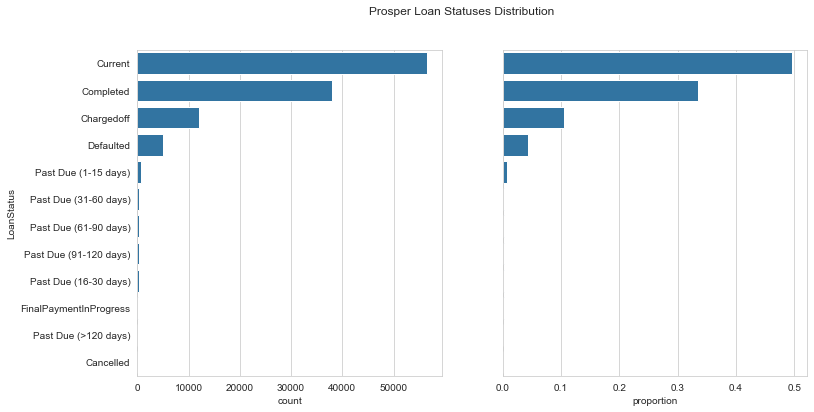

In [17]:
# plot bar charts for a qualitative nominal variable - counts & proportions

# set grid line style to facilitate reading the charts
#sb.set_theme()
sb.set_style("whitegrid")

# Specify the figure size, subplots, and title
rcParams['figure.figsize'] = 12,6
fig, [ax1, ax2] = plt.subplots(1,2)
fig.suptitle('Prosper Loan Statuses Distribution')

# choose single color 
base_color = sb.color_palette()[0]

# dynamically order bars
freq = df['LoanStatus'].value_counts()
freq_order = freq.index

# plot seaborn bar chart
sb.countplot(data=df, y='LoanStatus', color=base_color, order=freq_order, ax=ax1)

# labeling & formatting as required
#plt.title('LoanStatus (nominal variable) Counts')
plt.ylabel('count')
#plt.xlabel('LoanStats')
plt.xticks(rotation=0)

#-----plot 2-----

# Counts of the unique values in the series 
cat_counts = df.LoanStatus.value_counts()
      
# labels for cat_counts series (already in order of greatest to least count)
cat_counts_order = cat_counts.index

# sum of the unique value counts
n_cat_counts = df.LoanStatus.value_counts().sum()

# prop for highest frequency in the cat_counts column
max_prop = cat_counts[0] / n_cat_counts

# Use numpy.arange() function to produce a set of evenly spaced proportioned values 
tick_props = np.arange(0, max_prop+.1, 0.1)
tick_props

# Use a list comprehension to create tick_names that we will apply to the tick labels. 
tick_names = ['{:0.1f}'.format(v) for v in tick_props]
tick_names

# fig size
#rcParams['figure.figsize'] = 5,4

# plot
sb.countplot(data=df, y='LoanStatus', color=base_color, order=cat_counts_order, ax=ax2);

# Change the tick locations and labels
plt.xticks(tick_props * n_cat_counts, tick_names)
plt.yticks([])
plt.xlabel('proportion')
plt.ylabel('');

#### Q1 - Observations

>* The bulk of the data have "Current", "Completed", "Chargedoff", or "Defaulted" statuses.
>* Roughly ~10% and ~33% fall into the "Chargedoff" and "Completed" buckets (i.e. collectively they amount to roughly ~43-44% of the master (unmodified) dataset.
>* The percent "Completed" to "Chargedoff" is positive (i.e. roughly ~75% of loans were paid vs ~25% were charged-off), but I believe these percentages would conventionally/historically be much further removed from one another...perhaps the data is skewed more heavily toward charge-off than normal because the dataset spans the financial crisis of 2007-2008? (When we dig into the data a bit more later, maybe we can gain some confidence in this hypothesis.)
>* Past due statuses account for only fractional amounts of the current loans (which is good news for Prosper, and what I believe one would expect to observe.)
>
>Other Notes:
>* `LoanStatus` is a `nominal` categorical variable and therefore the results were reorder/ranked for plotting.
>* The above plots were shown to provide an overview of the Prosper data prior to focusing efforts on a specific subset of the data for exploration.
>* Exploration efforts will now focus on the historical loans (i.e. "Completed" and "Chargedoff" statuses).


### Question 2 - What is the distribution of the "LenderYield" variable?
>I believe this is an important variable to consider from a Performance / business perspective - lenders obviously want to see return on investment...

#### Q2 - Visualization
>For this variable we will plot using histograms since it is a quantitative variable. 2 different bin sizes will be used to look at the data from different angles per se...

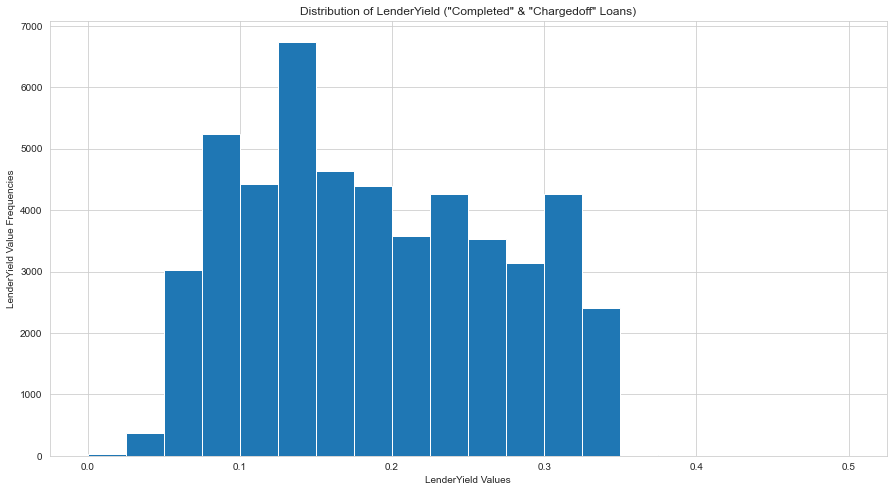

In [18]:
# create figure and axes and set figure size
fig, ax = plt.subplots(figsize=(15,8))

# Create bins with step-size 0.025
bins = np.arange(0, dfw.LenderYield.max()+0.025, 0.025)

# plot country co2 emissions in bar chart to compare
plt.hist(data=dfw, x='LenderYield', bins=bins)

# ax labeling (and legend if used)
ax.set_title('Distribution of LenderYield ("Completed" & "Chargedoff" Loans)')
ax.set_ylabel('LenderYield Value Frequencies')
ax.set_xlabel('LenderYield Values');

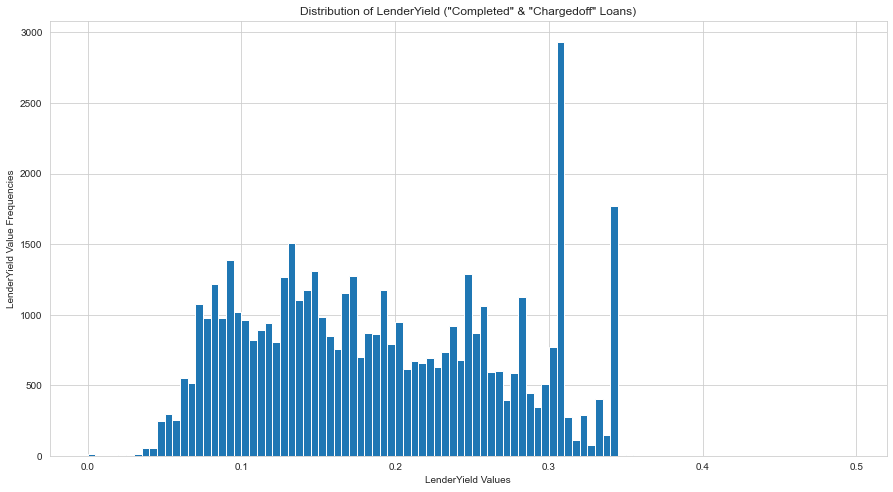

In [19]:
# create figure and axes and set figure size
fig, ax = plt.subplots(figsize=(15,8))

# Create bins with step-size 0.005 (....smaller bins used this time to see any outliers)
bins = np.arange(0, dfw.LenderYield.max()+0.005, 0.005)

# plot country co2 emissions in bar chart to compare
plt.hist(data=dfw, x='LenderYield', bins=bins)

# ax labeling (and legend if used)
ax.set_title('Distribution of LenderYield ("Completed" & "Chargedoff" Loans)')
ax.set_ylabel('LenderYield Value Frequencies')
ax.set_xlabel('LenderYield Values');

#### Q2 - Observations
>* The data appears to be right-skewed.
>* The smaller bins sizes in the 2nd plot reveal significant spikes near the right end of the distribution (in the range of 0.3 to 0.35 range).

### Question 3 - How is the "IncomeRange" variable distributed?
>Certain categories for this variable might prove to be related to successful/profitable vs. bad loans. But before looking into relationships, we will look at the variable by itself (i.e. univariate visualization) to try and better understand its data.
>
>Note: While the categories are somewhat mixed and not all of a clear-defined order I will attempt to reorder them and treat the categories as ordinal.


#### Q3 - Visualization

In [20]:
# prepare and reorder data for plotting
incomes = pd.DataFrame(dfw.IncomeRange.value_counts())
reorder = ['Not displayed', 'Not employed', '$0', '$1-24,999', '$25,000-49,999', '$50,000-74,999', '$75,000-99,999', '$100,000+']
incomes_rdx = incomes.reindex(reorder)
incomes_rdx

,IncomeRange
Not displayed,5990
Not employed,507
$0,555
"$1-24,999",4237
"$25,000-49,999",15049
"$50,000-74,999",11909
"$75,000-99,999",6065
"$100,000+",5741


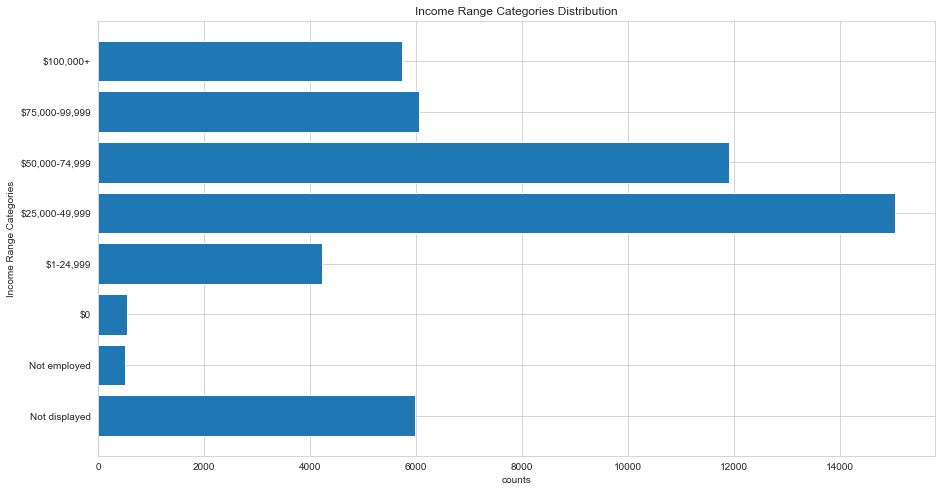

In [21]:
# fig size
plt.figure(figsize = [15,8]) 

# plot horizontal bar
plt.barh(incomes_rdx.index, incomes_rdx.IncomeRange);

# labeling
plt.xlabel('counts')
plt.ylabel('Income Range Categories')
plt.title('Income Range Categories Distribution');


#### Q3 - Observations

>From the bar chart above we see that:
>* The loan applicant incomes ranges are broken into 8 buckets.
>* The most prevalent income range was the \\$25k to \\$49,999 bin, with higher income earners not actively borrowing as much comparatively.
>* There appears to have been loans given even when there was no employment or no income (and there appears to be a large number in the "Not Displayed" bin, which might be similar to the former 2 bins (no employment/no income) in terms of risk.

### Question 4 - What types of loans "ListingCategory (numeric)" were there, and how is the variable distributed?
>Certain categories for this variable might also prove to be related to successful/profitable vs. bad loans. However, as before we will look at the variable separately first, and if it warrants further attention we may look at it from a potential relationship/predictor perspective later.
>
>Note: Although numbered (likely for standardization of inputs and ease of inputting), this variable will be treated as nominal categorical (i.e. unordered).

#### Q4 - Visualization

In [22]:
# before plotting lets take a quick peek at the data...
dfw['ListingCategory (numeric)'].value_counts()

1     16813
0     14045
7      5774
3      3955
2      3102
4      2197
6      1480
5       715
13      574
15      357
18      208
19      192
14      176
20      165
16       92
11       63
10       43
8        40
9        28
12       18
17       16
Name: ListingCategory (numeric), dtype: int64

>Because the variable of interest here is numeric in nature (and not self-explanatory without the lengthy variable definitions spreadsheet), I will build a new/working column of data that reflects the matching definitions to the numeric values; and this new column data will be used for visualization.

In [23]:
# copy paste variable definitions and remove numeric/symbolic portions
loan_cat_list = ['Not Available', 'Debt Consolidation', 'Home Improvement', 'Business', 'Personal Loan', 'Student Use',
              'Auto', 'Other', 'Baby&Adoption', 'Boat', 'Cosmetic Procedure', 'Engagement Ring', 'Green Loans',
              'Household Expenses', 'Large Purchases', 'Medical/Dental', 'Motorcycle', 'RV', 'Taxes', 'Vacation',
              'Wedding Loans']

# create indexed object (i.e. series) for matching
loan_cats = pd.Series(loan_cat_list)

# create new/working dataframe column
dfw['LoanCat'] = np.nan 

# loop to assign string based on numeric match
for row in dfw.index:
    match = dfw['ListingCategory (numeric)'].loc[row]
    dfw['LoanCat'].loc[row] = loan_cats[match]

/opt/anaconda3/envs/36py/lib/python3.6/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [24]:
print(dfw.LoanCat.value_counts().sum())
dfw.LoanCat.value_counts()

50053


Debt Consolidation    16813
Not Available         14045
Other                  5774
Business               3955
Home Improvement       3102
Personal Loan          2197
Auto                   1480
Student Use             715
Household Expenses      574
Medical/Dental          357
Taxes                   208
Vacation                192
Large Purchases         176
Wedding Loans           165
Motorcycle               92
Engagement Ring          63
Cosmetic Procedure       43
Baby&Adoption            40
Boat                     28
Green Loans              18
RV                       16
Name: LoanCat, dtype: int64

>The warning above is acknowledged, but testing shows that the column data is as expected and complete. The data is now ready for plotting.

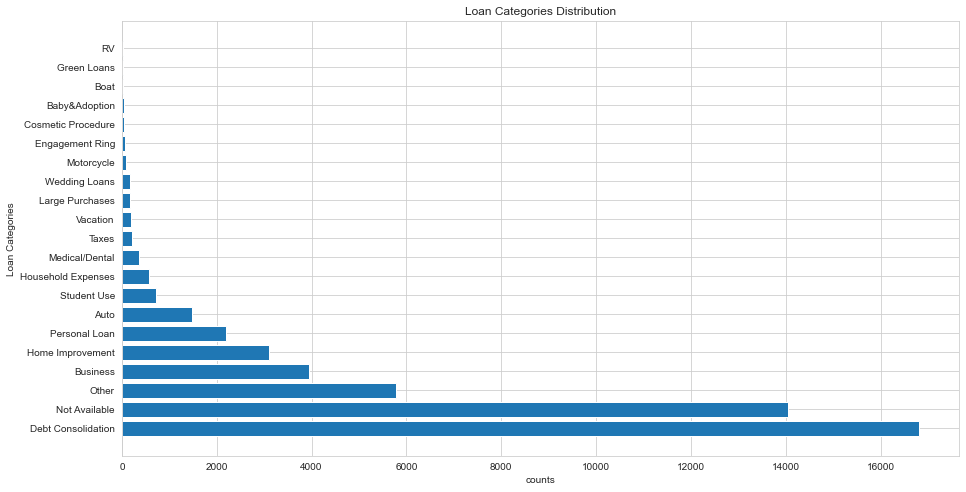

In [25]:
# fig size
plt.figure(figsize = [15, 8]) 

# plot horizontal bar
plt.barh(dfw.LoanCat.value_counts().index, dfw.LoanCat.value_counts());

# labeling
plt.xlabel('counts')
plt.ylabel('Loan Categories')
plt.title('Loan Categories Distribution');

#### Q4 - Observations

>From the bar chart above we see that:
>* There are a wide variety of loan categories with a wide variance in terms of frequency (i.e. count).
>* The top 5 largest loan categories are "Debt Consolidation", "Not Available", "Other", "Business", and "Home Improvement", with the top 2 categories more than doubling the third highest category.
>* It seems odd that so many loans fell into "Other" and "Not Available".
>* Perhaps the "Debt Consolidation" loans stemmed from the Finacial Crisis ("Great Recession").

### Question 5 - What sorts of dollar-values were the loans?
>Perhaps the values of the loans will relate to certain variable categories - we will look at such things in the "Bivariate Exploration" section, and for now we will continue looking at the variable independently to gain any potential insights and further understanding of the data.


#### Q5 - Visualization

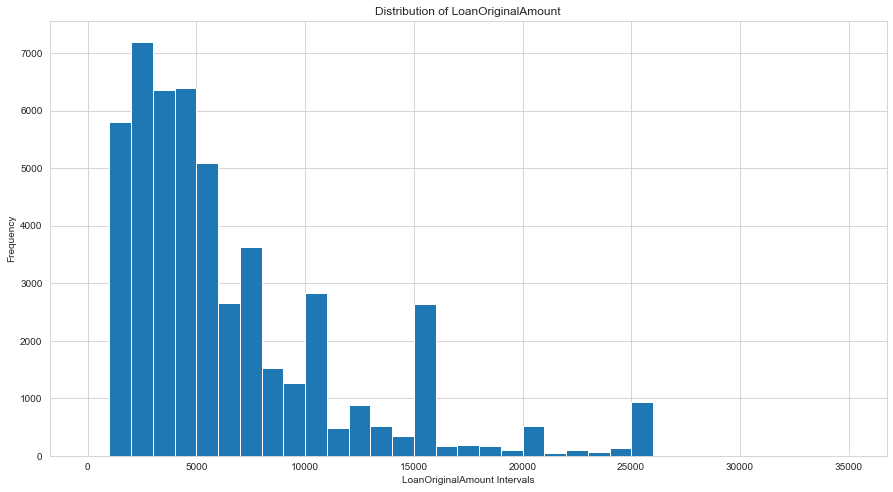

In [26]:
# create figure and axes and set figure size
fig, ax = plt.subplots(figsize=(15,8))

# Create bins with step-size 1k 
bins = np.arange(0, dfw.LoanOriginalAmount.max()+1000, 1000)

# plot country co2 emissions in bar chart to compare
plt.hist(data=dfw, x='LoanOriginalAmount', bins=bins)

# ax labeling (and legend if used)
ax.set_title('Distribution of LoanOriginalAmount')
ax.set_ylabel('Frequency')
ax.set_xlabel('LoanOriginalAmount Intervals');

#### Q5 - Observations

>From the histogram plot we can see that:
>* The data is very skewed to the right and looks like a good candidate for utilizing a log transformation (to yield a more balanced distribution / better model).
>* The bulk of Prosper loans in the subset of interest ("Completed" + "Chargedoff") are at the low end in the \\$1,000 to \\$6,000 range.


### Question 6 - Does the 'LoanOriginalAmount' distribution log-transformation improve model?
>Let's see if the variable will be better modeled as a log-normal distribution (i.e. will it be more well balanced, allowing for more consistent prediction over the entire range of values).

#### Q6 - Visualization

In [27]:
# Transform the describe() to a scale of log10
np.log10(dfw['LoanOriginalAmount'].describe())

count    4.699430
mean     3.795090
std      3.711787
min      3.000000
25%      3.431364
50%      3.653213
75%      3.903090
max      4.544068
Name: LoanOriginalAmount, dtype: float64

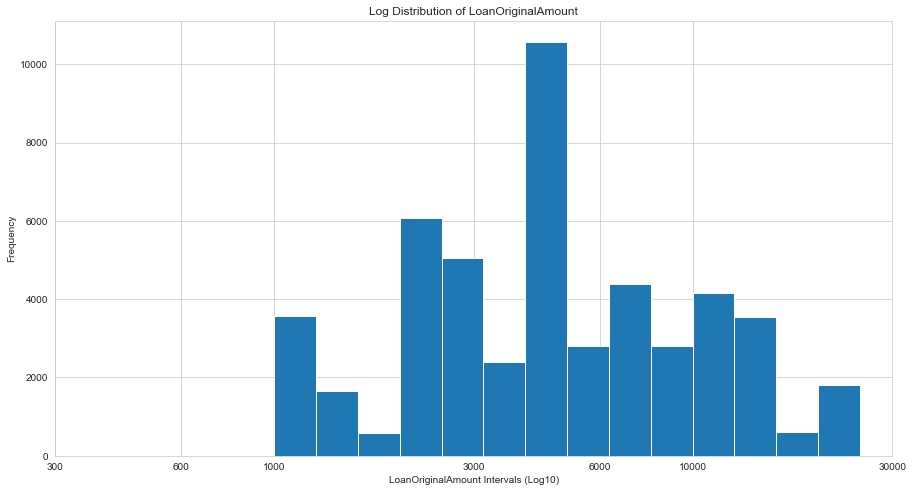

In [28]:
# create figure and axes and set figure size
fig, ax = plt.subplots(figsize=(15,8))

# Transform the describe() to a scale of log10
loa_max = np.log10(dfw['LoanOriginalAmount'].describe()).loc['max']

# Get the ticks for bins between [0 - maximum $amount]
bins = 10 ** np.arange(0, loa_max+.1, .1)

# Generate the x-ticks
ticks = [30, 60, 100, 300, 600, 1000, 3000, 6000, 10000, 30000]
# Convert ticks into string values, to be displayed long the x-axis
labels = ['{}'.format(v) for v in ticks]

# Plot the histogram
plt.hist(data=dfw, x='LoanOriginalAmount', bins=bins);

# The argument in the xscale() represents the axis scale type to apply.
# The possible values are: {"linear", "log", "symlog", "logit", ...}
plt.xscale('log')

# Apply x-ticks
plt.xticks(ticks, labels)

# new axis range/limits
plt.xlim((300,30000));

# ax labeling (and legend if used)
ax.set_title('Log Distribution of LoanOriginalAmount')
ax.set_ylabel('Frequency')
ax.set_xlabel('LoanOriginalAmount Intervals (Log10)');

#### Q6 - Observations

From the plot above we see that:
>* Post log-transform, the data is now roughly normally distributed.
>* The bulk of loans in the subset are still shown at the low end in the \\$1,000 to \\$6,000 range (as expected for a correct transformation and axis rescaling).

## Bivariate Exploration

> In general, this report section investigates relationships between pairs of variables explored in the previous section (univariate exploration).

### Question 7 - Does there appear to be potential bivariate correlations in the data?
>Initially before diving in any further with individual bivariate plots, we will use a Pandas scatter matrix plot to help identify some potential correlations. (Note: only select variables will be plotted to prevent the matrix from becoming too small to read.)

#### Q7 - Visualization

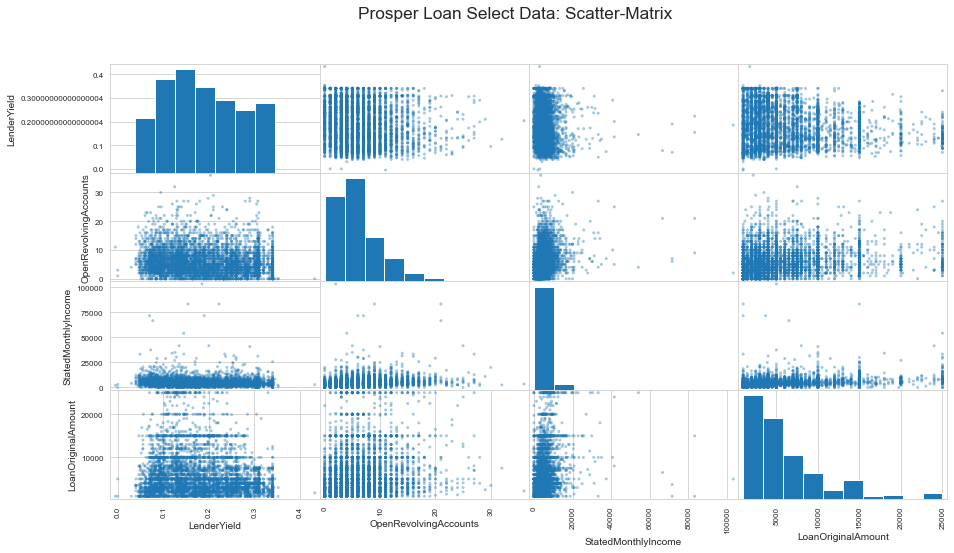

In [29]:
# create select-data dataframe slice
df_scat = dfw.loc[:, ['LoanStatus', 'LenderYield', 'OpenRevolvingAccounts',
                      'StatedMonthlyIncome', 'LoanOriginalAmount']]

# plot (used sampling: ~10% of data observations)
pd.plotting.scatter_matrix(df_scat.sample(5000), alpha=0.4, figsize=(15,8))

# title
plt.suptitle('Prosper Loan Select Data: Scatter-Matrix', fontsize='xx-large');

#### Q7 - Observations

>From the scatter matrix we observe the following:
>* As expected, from the first and last diagonal plots we notice distributions of the 'LenderYield' and 'LoanOriginalAmount' variables that we saw earlier.
>* **'LenderYield'** may have a slight negative correlation with 'OpenRevolvingAccounts'; perhaps a little stonger negative correlation with 'LoanOriginalAmount'; and possibly a strong negative correlation with 'StatedMonthlyIncome' (or no correlation at all) but it is difficult to tell in this plot.
>* **'OpenRevolvingAccounts'** may also have a strong negative correlation with 'StatedMonthlyIncome' (or no correlation at all) and possibly a small negative correlation with 'LoanOriginalAmount'.
>* Due to the prescence of outliers the resultant axis scale makes it very difficult to read some of the **'StatedMonthlyIncome'** plots - these may be investigate later as individual bivariate plots.
>
>General Notes:
>* Not all of these potential relationships/correlations will be investigated, however, I wanted to take this first step to look at the data at a high level before working on the individual bivariate/multivariate plots.
>* Some potential correlations (or lack thereof) may become more clear when we create individual bivariate plots and employ visualization improvements (e.g. alpha, sampling, jitter) and when we look at specific buckets/categories such as 'Completed' vs. "Chargedoff' loans.

### Question 8 - Does 'StatedMonthlyIncome' appear to be correlated with 'LenderYield'?
>Let's take a closer look at the 'StatedMonthlyIncome' variable to see if it may be a positive or negative indicator for 'LenderYield'.

#### Q8 - Visualization

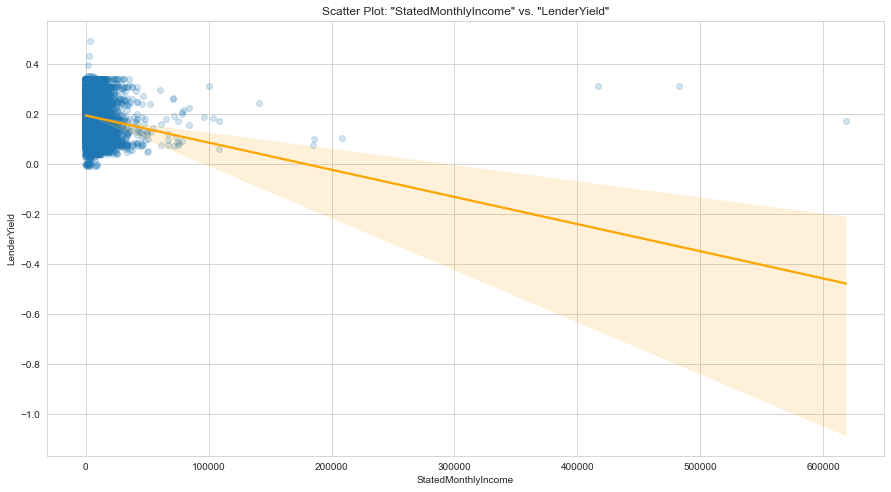

In [30]:
# create fig and graph (ax)
fig, ax = plt.subplots(figsize=(15,8))

# scatter plot and labeling
sb.regplot(data = dfw, x = 'StatedMonthlyIncome', y = 'LenderYield', 
           x_jitter=500, scatter_kws={'alpha':0.20}, line_kws={"color": "orange"})
plt.title('Scatter Plot: "StatedMonthlyIncome" vs. "LenderYield"')
plt.xlabel('StatedMonthlyIncome')
plt.ylabel('LenderYield');

>**Note:** The above outliers are throwing the chart scale off rending the chart not very useful. To identify where to establish our cut off for outliers, we will use a box plot.

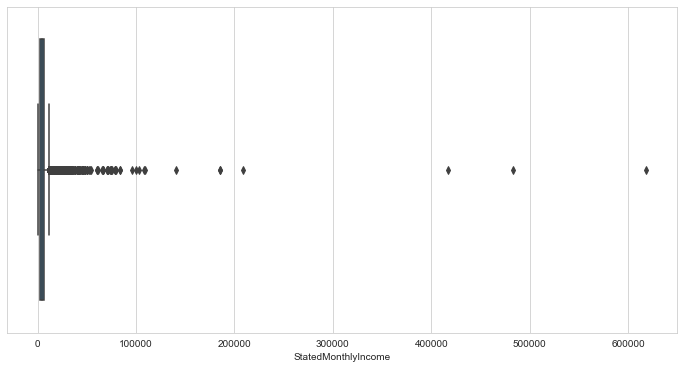

In [31]:
# figure size
plt.figure(figsize=(12,6))
       
# bot plot
ax = sb.boxplot(x=dfw["StatedMonthlyIncome"])

>**Note:** Initially from looking at the scatter plot, I was going to use \\$100k as a cut-off (to help keep more data), but after creating the boxplot its obvious that more data will need to be discarded...Let's calc the IQR and then remove the values greater than the 1.5xIQR from the end of the boxplot box...

In [32]:
# calc iqr and establish outlier threshold (1.5 x IQR + Q3_value)
iqr = (dfw["StatedMonthlyIncome"].describe().loc['75%'] - dfw["StatedMonthlyIncome"].describe().loc['25%'])
outlier_thres = dfw["StatedMonthlyIncome"].describe().loc['75%'] + 1.5 * iqr 
outlier_thres

11366.125

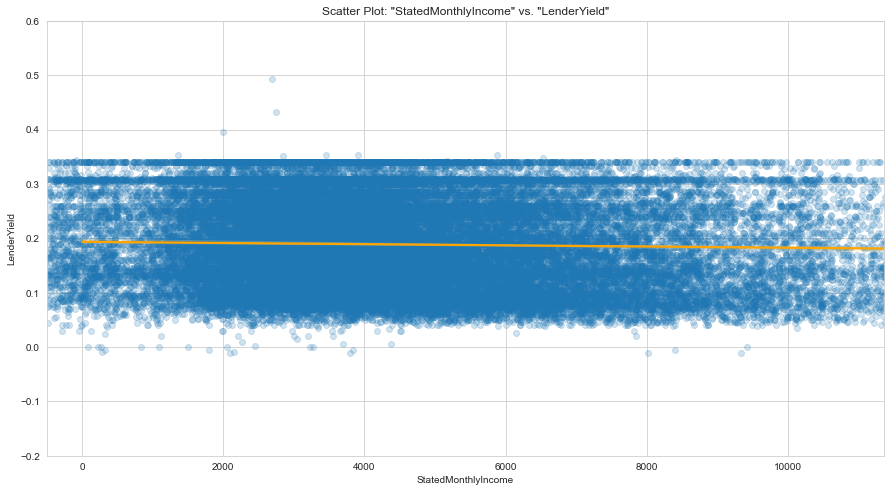

In [33]:
# create fig and graph (ax)
fig, ax = plt.subplots(figsize=(15,8))

# scatter plot and labeling
sb.regplot(data = dfw, x = 'StatedMonthlyIncome', y = 'LenderYield', x_jitter=500,
           scatter_kws={'alpha':0.20}, line_kws={"color": "orange"})
plt.title('Scatter Plot: "StatedMonthlyIncome" vs. "LenderYield"')
plt.xlabel('StatedMonthlyIncome')
plt.ylabel('LenderYield')

# using x/ylim to address outliers and axis scale issues
plt.xlim((-500,11367))
plt.ylim((-0.2,0.6));

#### Q8 - Observations

>Observations from the plots above:
>* There were significant outliers, which had a material effect on the scatter plot/regrression line (if the outliers weren't discounted, there would have appeared to be a potential negative correlation. 
>* After the outliers and plot scaling were addressed, we can see that a potential correlation does not appear to exist.
>* The outlier threshold (i.e. max whisker) of ~\\$11k was lower than expected.
>
>Note: The full data was used above because the primary purpose of this section was to see if there was a correlation (i.e. create a regression line of best fit), and there is no need to differentiate the points, nor will the graphic be used in the explanatory presentation. So while it would be an easy task to reduce the points via `.sample()` method, I didn't bother to do so in this explanatory part-1 notebook.


### Question 9 - How did the dollar amount of loans/borrowing flucutate over time?
>I would like to see if there was a certain periods saw an increase or decrease in loan activity. To do this we will plot a quarterly time series (line chart).

#### Q9 - Visualization

In [34]:
# quarterly quarter-end loan original amount totals
dfw['ListingCreationDate'] = pd.to_datetime(dfw.ListingCreationDate)
qtrly_loan_amts = dfw.groupby(dfw['ListingCreationDate'].dt.to_period('Q'))['LoanOriginalAmount'].sum()

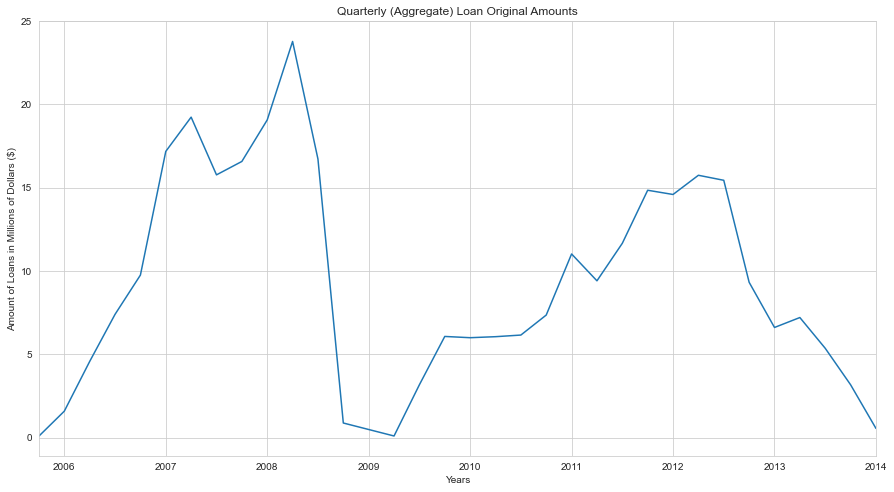

In [35]:
# create fig and graph (ax)
fig, ax = plt.subplots(figsize=(15,8))

# line plots
qtrly_loan_amts.plot(ax=ax)

# ax labels (and legend if used)
ax.set_title('Quarterly (Aggregate) Loan Original Amounts')
ax.set_ylabel('Amount of Loans in Millions of Dollars ($)')
ax.set_xlabel('Years');

y_ticks, y_labels = plt.yticks()
#print(y_ticks)

plt.yticks(y_ticks[1:], ['0', '5', '10', '15', '20', '25']);


###### Q9 - Observations

Wow...From the line plot above we can see that:
>* There have been huge fluctuations in the amount of loans/borrowing in the above time period (~8years).
>* The distibution looks bi-modal with 2 distinct upward rises each followed by even steeper declines in the amount of loans/borrowing.
>* The distribution depicts a boom and bust cyclical scenario (at least for these 8 years or so)

### Question 10 - Does there appear to be any correlation between 'LenderYield'  throughout the cycles?
>To see how LenderYield flucuated through the ~2006-2014 period, I will plot another line chart, but superimposed on the chart from question 7 (to help with comparison).

#### Q10 - Visualization

In [37]:
# quarterly 'LenderYield' means series
qtrly_mean_yield = dfw.groupby(dfw['ListingCreationDate'].dt.to_period('Q'))['LenderYield'].mean()

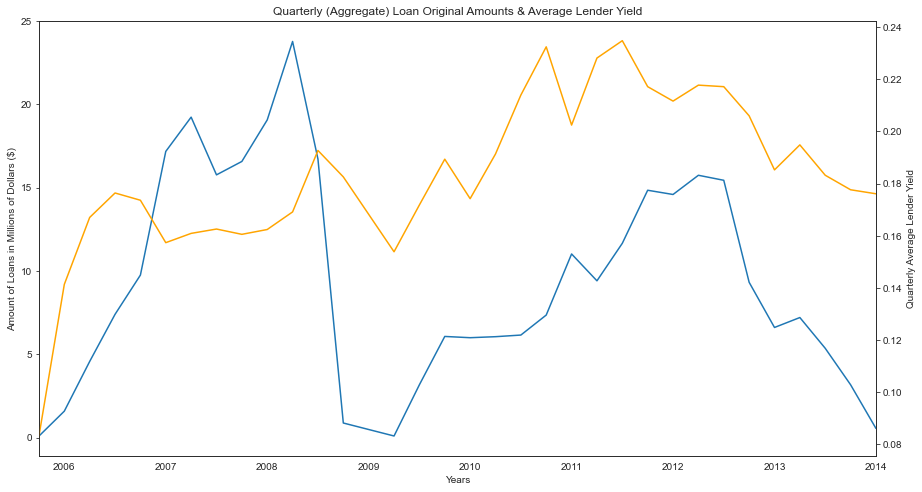

In [38]:
# change plot style (to avoid noisy double gridlines)
sb.set_style('white')

# create fig and graph (ax)
fig, ax = plt.subplots(figsize=(15,8))

# line plots
qtrly_loan_amts.plot(ax=ax)

# ax labels (and legend if used)
ax.set_title('Quarterly (Aggregate) Loan Original Amounts & Average Lender Yield')
ax.set_ylabel('Amount of Loans in Millions of Dollars ($)')
ax.set_xlabel('Years');

# get and set first plot y-ticks
y_ticks, y_labels = plt.yticks()
plt.yticks(y_ticks[1:], ['0', '5', '10', '15', '20', '25'])

# instantiate a second axes that shares the same x-axis
ax2 = ax.twinx()  

# 2ndary axis label, plot with different line color
ax2.set_ylabel('Quarterly Average Lender Yield') 
color = 'tab:orange'
qtrly_mean_yield.plot(ax=ax2, color="orange");

#### Q10 - Observations

>From the chart above we observe:
>* Both variables appear to somewhat correlated to one another, e.g. as one variable goes up the other variable sometimes follows, however, there are some leads/lags and chatter indicating the variables may not be strongly correlated.
>* Also, interestingly the 'LenderYield' did not take as much of a hit relative to the severe downturn in loans/borrowing...While it did dip around 2009, it didn't dip much before resuming its upward trajectory.
>* The 'LenderYield' ended the charted period well above were it began, however in contrast the amount of loans/borrowing ('LoanOriginalAmounts') ended the period almost where it began.

### Question 11 - How strongly correlated are the quarterly 'LenderYield' and 'LoanOriginalAmount'?
>Let's try and answer this question, and whether 'LoanOriginalAmount' might be able to help predicting 'LenderYield'. A scatter plot here using raw data from the dataset rather than aggregated values.

#### Q11 - Visualization

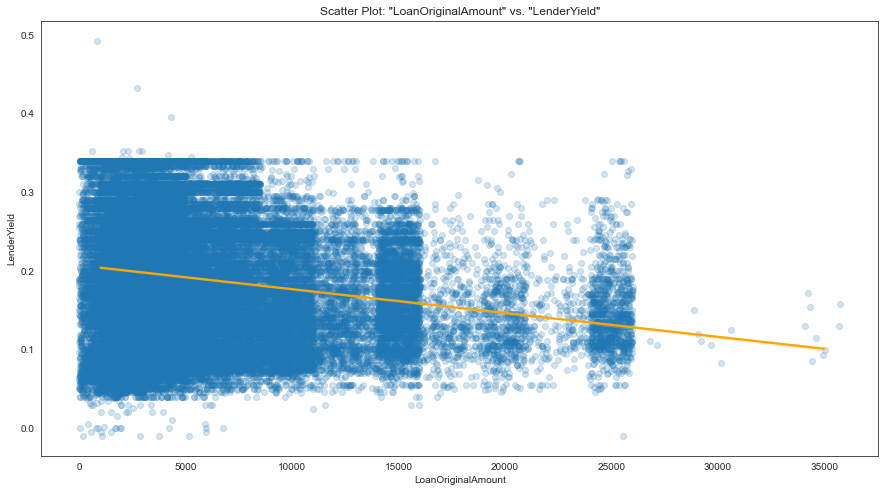

In [39]:
# first plot with full data series

# create fig and graph (ax)
fig, ax = plt.subplots(figsize=(15,8))

# scatter plot and labeling
sb.regplot(data = dfw, x = 'LoanOriginalAmount', y = 'LenderYield', x_jitter=1000, scatter_kws={'alpha':0.20}, line_kws={"color": "orange"})
plt.title('Scatter Plot: "LoanOriginalAmount" vs. "LenderYield"')
plt.xlabel('LoanOriginalAmount')
plt.ylabel('LenderYield');

As can be seen above, we have some significant overplotting happening, and unfortunately decreasing 'alpha' (i.e. increasing transparency) and adding jitter didn't help enough. As a result we will try to replot using a sample of the data.

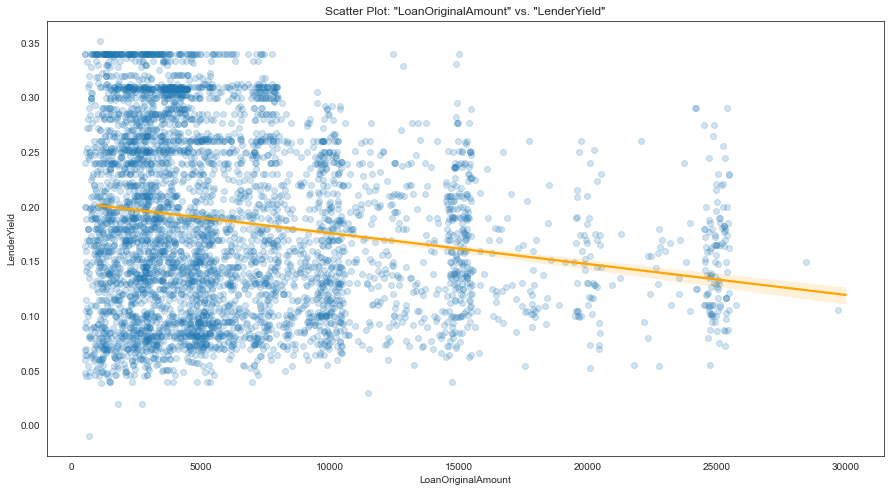

In [40]:
# 2nd plot with sampled data from the series (and jitter and reduced alpha...)

# generate sample data to plot (roughly 10% of the data)
dfw_samp = dfw.sample(5000, replace=True)

# create fig and graph (ax)
fig, ax = plt.subplots(figsize=(15,8))

# scatter plot and labeling
sb.regplot(data = dfw_samp, x = 'LoanOriginalAmount', y = 'LenderYield', x_jitter=500, scatter_kws={'alpha':0.20}, line_kws={"color": "orange"})
plt.title('Scatter Plot: "LoanOriginalAmount" vs. "LenderYield"')
plt.xlabel('LoanOriginalAmount')
plt.ylabel('LenderYield');

#### Q11 - Observations

>From the above scatter plot(s) we observe the following:
>* With ~50k points in the first plot, overplotting was an issue - it was mostly addressed using sampling as can be seen in the 2nd figure (directly above), but jitter and transparency also helped in clarifying the plot.
>* Overall there does appear to be a potential small negative correlation between 'LoanOriginalAmount' and 'LenderYield' (i.e. as 'LoanOriginalAmount' increases, we might expect that 'LenderYield would decrease). This potential correlation could be explained by smaller interest rates being charged on larger loans for example.
>* Even with the overplotting addressed we can still see vertical banding in the data around round whole numbers. This might be explained by loans for round-numbered items (e.g. a boat or car costing \\$5,000) or lines of credit/loans that have a round value (e.g. \\$10,000 personal loan).
>* There is significant variance in the data (which might be expected since 'LenderYield' and interest rates in general flucuate from quarter-to-quarter and year-to-year, and even more importantly every loan applicant's financial situation (and therefore risk to the lender) is different).
>* There are some outliers, but not many relative to the overall sample and so there effects should be minimal.
>
>Note: The scatter plot above is further investigated in the Multivariate report section below.

## Multivariate Exploration

> In this section, the data will be explored with plots of three or more variables. The investigations will will be accompanied by justifications and results/observations, and will be related to the work done in the previous sections. 

### Question 12 - Do loan types/categories correlate to or influence 'LenderYield?
>This is a follow-on to the last plot observations. To try and answer this question let's create another scatter plot and add the various loan types/categories.

#### Q12 - Visualization

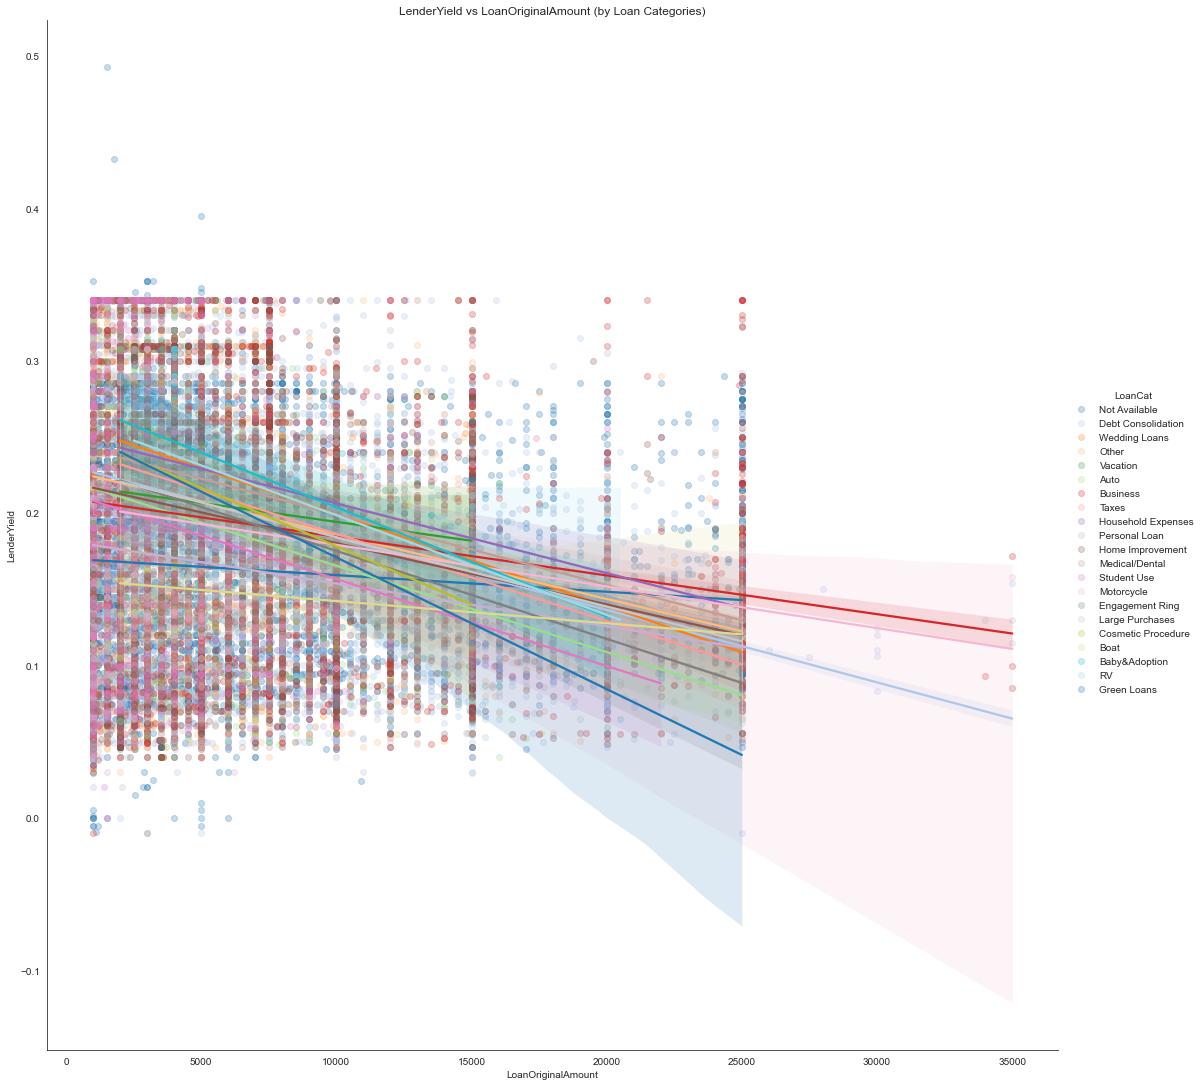

In [41]:
# plot scatter plot with line of best fit of LoanYield vs LoanOriginalAmount with types/categories by color
g = sb.lmplot(x="LoanOriginalAmount", y="LenderYield", hue="LoanCat", data=dfw, palette='tab20', 
              height=15, scatter_kws={'alpha':0.25});

# labeling
g.set_axis_labels("LoanOriginalAmount", "LenderYield")
plt.title('LenderYield vs LoanOriginalAmount (by Loan Categories)');

#### Q12 - Observations

>The full subset of data (~50k records) was used for the above plot, so it is busy and noisy. This plot is not a good explanatory plot. However, the plot does indicate that regardless of what type/category the loan was, the LenderYield vs. LoanOriginalAmount appears to be negatively correlated. However, the differences in the best fit line slopes do indicate that each loan category may have some small differing influence on the 'LenderYield' vs. 'LoanOriginalAmount' (Note: each cateogry would need to be looked at separately, as there are various counts in each).
>
>Other observations include:
>* Additional outliers are visible (since the full dataset is being used and not a random sample), but based on the relative number of these I have not bothered to remove them as they will not have a significant impact on the results (Note: I am not planning on looking at the individual categories, in which case the outliers would be more important.)
>* The bulk of the scatter plot data appears to fall within a box delineated by approximately ~0.04 to ~0.34 in term of "LenderYield", and about ~1,000 to ~25,000. (Perhaps these are the limits of their typical loan offerings).
>* And the highest density in the scatter plot exists roughly between \\$1,000 and \\$6000 as we have seen before. 
>
>Note: I had thought there might be some clustering or perhaps some major differences in best fit lines for the different categories of loans, but there doesn't appear to be anything that significant or useful here, so loan categories won't be considered any further.

### Question 13 - Did loan income range frequencies (or their reporting) change based on the financial crisis? And how did it factor into loan statuses (i.e. investment outcomes)?  

> These questions will be answered by plotting 'IncomeRange' vs. 'LoanStatus' vs. 'ListingCreationTime' using a bar (`.countplot()`) faceted approach. 'ListingCreationTime' is important since pre-crisis loan listing application completeness/accuracy would like have been much more lax than after the crisis.

#### Q13 - Visualization

In [42]:
# create new column to hold categorical variable pre-crisis vs post-crisis
dfw['crisis'] = np.nan

In [43]:
# create threshold for assigning pre-crisis vs post-crisis lending habits/practices

# Used end of 2008/ start of 2009 as the pre/post-crisis break (based on the 
# line charts above, it didn't look like lending started again until around this time) 
crisis_ts = pd.Timestamp(year=2008, month=12, day=31)

for i in range(dfw.shape[0]):
    if dfw['ListingCreationDate'].iloc[i] > crisis_ts:
        dfw['crisis'].iloc[i] = 'post_crisis'
    elif dfw['ListingCreationDate'].iloc[i] <= crisis_ts:
        dfw['crisis'].iloc[i] = 'pre_crisis'


/opt/anaconda3/envs/36py/lib/python3.6/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [44]:
# warning acknowledged...test/check below
print(dfw.crisis.value_counts(), '\n', f'Num of entries: {dfw.crisis.value_counts().sum()}')
dfw.head(2)

pre_crisis     25039
post_crisis    25014
Name: crisis, dtype: int64 
 Num of entries: 50053


,ListingKey,ListingNumber,ListingCreationDate,Term,LoanStatus,BorrowerRate,LenderYield,ListingCategory (numeric),IsBorrowerHomeowner,CurrentlyInGroup,DateCreditPulled,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,IncomeRange,IncomeVerifiable,StatedMonthlyIncome,LoanKey,LoanCurrentDaysDelinquent,LoanMonthsSinceOrigination,LoanNumber,LoanOriginalAmount,LoanOriginationDate,LoanOriginationQuarter,MemberKey,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors,LoanCat,crisis
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263,36,Completed,0.158,0.138,0,True,True,2007-08-26 18:41:46.780000000,1,24.0,"$25,000-49,999",True,3083.333333,E33A3400205839220442E84,0,78,19141,9425,2007-09-12 00:00:00,Q3 2007,1F3E3376408759268057EDA,330.43,11396.14,9425.0,1971.14,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258,Not Available,pre_crisis
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090,36,Completed,0.275,0.240,0,False,True,2007-01-02 14:09:10.060000000,0,0.0,Not displayed,True,2083.333333,6954337960046817851BCB2,0,86,6466,3001,2007-01-17 00:00:00,Q1 2007,5F7033715035555618FA612,123.32,4186.63,3001.0,1185.63,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41,Not Available,pre_crisis


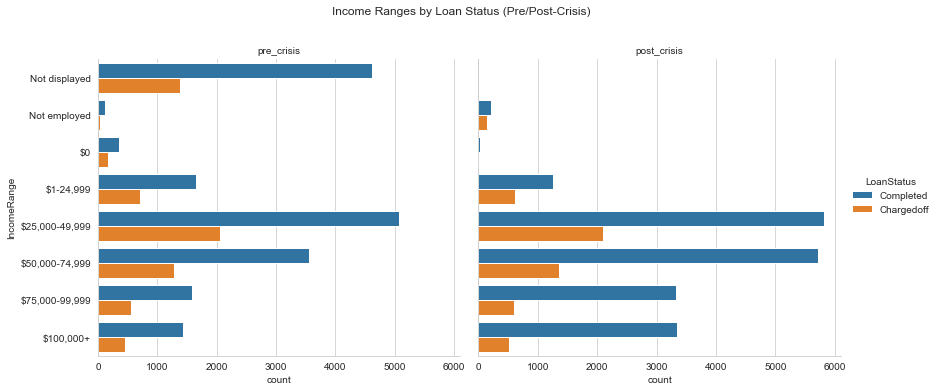

In [45]:
# set grid line style to facilitate reading the charts
sb.set_style("whitegrid")

# catplot (essentiallyu FacetGrid with Countplot)
g = sb.catplot(y="IncomeRange", hue="LoanStatus", col='crisis', kind="count", palette='tab10',
           data=dfw, order=reorder, aspect=1.2, ci=None, legend_out=True, sharey=True)
# title
g.set_titles('{col_name}')

plt.suptitle('Income Ranges by Loan Status (Pre/Post-Crisis)', y=1.08);

>**Note/Interim Observation:**
>* As can be seen above, there are definitely differences between the counts in the various categories, however, in an effort to make deltas easier to see/compare, another clustered bar chart will be plotted using a differences/deltas feature.

In [46]:
# Ref: https://www.geeksforgeeks.org/pandas-all-combinations-of-two-columns/
# use itertools "product" function to generate possible combinations (combo) for our 3 variable columns in question
combos = list(product(dfw.crisis.value_counts().index, dfw.IncomeRange.value_counts().index, dfw.LoanStatus.value_counts().index))
combos = pd.DataFrame(data=combos, columns=['Crisis', 'Income Range', 'Loan Status'])

#create a separate new dataframe with an added column to capture count quantities
df_query = combos.copy()
df_query[['qty']] = np.nan
df_query.head(2)

,Crisis,Income Range,Loan Status,qty
0,pre_crisis,"$25,000-49,999",Completed,NaN
1,pre_crisis,"$25,000-49,999",Chargedoff,NaN


In [47]:
# loop through our 3 category column combos and use .query() to get the counts
for i in range(combos.shape[0]):
    a = combos.loc[i][0]
    b = combos.loc[i][1]
    c = combos.loc[i][2]

    # query to get the count for each combo
    df_query['qty'].loc[i] = dfw.query('(crisis == @a) & (IncomeRange == @b) & (LoanStatus == @c)').shape[0]

    # if-else statement to check and report regarding the number of elements in our new 'qty' column
if df_query.qty.astype(int).sum() == dfw.shape[0]:
    print(f'Warning acknowledged and checked. Success - all rows ({dfw.shape[0]}) accounted for.')
else:
    print('error - all rows not accounted for.')
    

Warning acknowledged and checked. Success - all rows (50053) accounted for.


/opt/anaconda3/envs/36py/lib/python3.6/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [48]:
# use .pivot() to move the post/pre_crisis from long to wide
df_working = df_query.pivot(index=['Income Range', 'Loan Status'], columns='Crisis')

# reset index, moving Income Range and Loan Status back into the dataframe as columns
df_working.reset_index(inplace=True)

# flatten the column multi-index
df_working.columns = df_working.columns.to_flat_index()
df_working.head(3)

,"(Income Range, )","(Loan Status, )","(qty, post_crisis)","(qty, pre_crisis)"
0,$0,Chargedoff,11.0,174.0
1,$0,Completed,18.0,352.0
2,"$1-24,999",Chargedoff,613.0,716.0


In [49]:
# transpose dataframe to allow easy removal of the flattened column multi-index via reset_index()
df_working_t = df_working.T.reset_index(drop=True)

# then transpose back and rename columns
df_delta = df_working_t.T
df_delta.rename(columns={0: "Income Range", 1: "Loan Status", 2: "Post-Crisis", 3: "Pre-Crisis"}, inplace=True)

# add new column to capture delta
df_delta['Delta'] = df_delta['Post-Crisis'] - df_delta['Pre-Crisis']

In [50]:
#df_delta.info() ...checked and Delta variable was dtype object...
df_delta.Delta.astype(int)
df_delta.sort_values(by='Loan Status', ascending=False).head()

,Income Range,Loan Status,Post-Crisis,Pre-Crisis,Delta
1,$0,Completed,18,352,-334
3,"$1-24,999",Completed,1250,1658,-408
5,"$100,000+",Completed,3344,1429,1915
7,"$25,000-49,999",Completed,5812,5075,737
9,"$50,000-74,999",Completed,5719,3557,2162


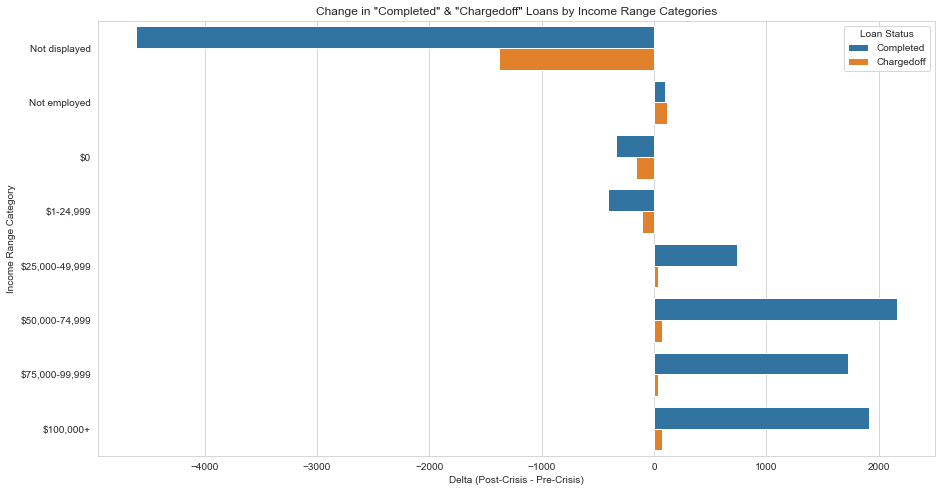

In [51]:
# fig size
plt.figure(figsize = [15,8])

# correct hue order to match up with the previous faceted plot
hue_ord = ['Completed', 'Chargedoff']

# barplot
sb.barplot(x=df_delta.Delta, y=df_delta['Income Range'], hue=df_delta['Loan Status'], data=df_delta, 
           order=reorder, hue_order=hue_ord, ci=None, units=None, seed=None, orient=None, color=None,
           palette=None, dodge=True, ax=None)

#labeling
plt.title('Change in "Completed" & "Chargedoff" Loans by Income Range Categories')
plt.xlabel('Delta (Post-Crisis - Pre-Crisis)')
plt.ylabel('Income Range Category');



>The key observations are:
>* The upper portion of the plot likely represents the riskier group of loans since the borrower didn't report or didn't have income, or had low income...This being said, we see a major improvement in these Income Range categories (e.g. for "Completed" post-crisis there were ~4,600 fewer income "Not Displayed" loans and ~700 fewer loans in the \\$0 and "Not employed" categories.
>* From the lower portion of the chart we see that post-crisis we have siginificantly more borrowing that falls into the higher income ranges.
>* Also of note, is that the overall total of "Chargedoff" (i.e. bad) loans is significantly less post-crisis.
>* So overall, it appears that this lender has really improved its application/loaning practices post crisis.
>
>Other Notes:
>*One surprising was thtat the "Not employed" income range category went up for both Loan Status types post-crisis...perhaps some folks had assets they could borrow against.

### Question 14 - How did Ambiguous & Higher-Risk Loan Listing Categories Change Pre/Post-Crisis? And how did it factor into loan statuses (i.e. investment outcomes)?
>Loan Listing Categories were looked at in the univariate section earlier in this report. To try to expand the investigation into this variable, similar to the last question/visualization, we will create a faceted bar plot, but will focus our attention to the top 3 most frequent categories.

In [52]:
# Top 3 overall loan Listing Categories...
print(dfw.LoanCat.value_counts().sum())
dfw.LoanCat.value_counts().head(3)

50053


Debt Consolidation    16813
Not Available         14045
Other                  5774
Name: LoanCat, dtype: int64

#### Q14 - Visualization

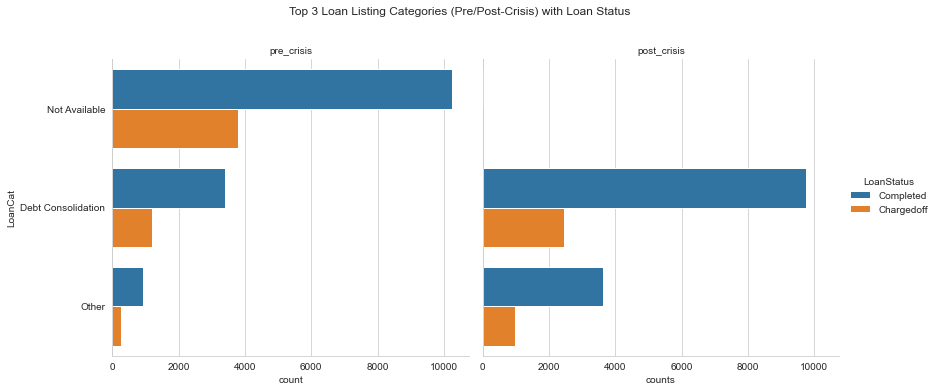

In [53]:
# set grid line style to facilitate reading the charts
sb.set_style("whitegrid")

# top3 categories query (generate date for plot)
df_top3_cats = dfw.query('(LoanCat == "Not Available") | (LoanCat == "Debt Consolidation") | (LoanCat == "Other")')

# catplot (essentially FacetGrid with Countplot)
g = sb.catplot(y="LoanCat", hue="LoanStatus", col='crisis', kind="count", palette='tab10',
           data=df_top3_cats, order=None, aspect=1.2, ci=None, legend_out=True, sharey=True)
# title
g.set_titles('{col_name}');

# labeling
plt.xlabel('counts')
plt.ylabel('Loan Categories')
plt.suptitle('Top 3 Loan Listing Categories (Pre/Post-Crisis) with Loan Status', y=1.08);

#### Q14 - Observations

>Key observations from the plot include:
>* Post-crisis there were zero (0) ambiguous "Not Available" loans listed. 
>* Post-crisis there was a dramatic increase in 'Debt Consolidation" loans (which is to be expected based on job and business losses which resulted because of the finanical crisis/crash).
>* Surprising, was that another ambiguous loan listing category "Other" went up post-crisis (I would have thought it would have went down due to stricter lending and better reporting).
>* The number of Chargedoff loans were less post crisis.
>* So again overall, lending practices (i.e. more explanatory/accurate application loan data reporting) improved post crisis.

## Summary and Conclusions (Part 1 of Project)
>In summary, here are the primary steps taken as part of this project to generate meaningful and insightful visualizations and observations:
>1. Reviewed dataset options, selected Prosper Loan Data and reviewed variable definitions. 
>2. Wrangling (loading, initial assessment/exploration, initial cleaning/conditioning, iterative re-
assessment and cleaning/massaging in support of the visualization efforts).
>3. Developed a preliminary plan/focus (e.g. performance indicators (e.g. "LenderYield" and "Completed" Loans) and risk/concern areas (e.g. "IncomeRange" variable, "Chargedoff" loans, "ListingCategory").
>4. Investigated/explored numerous variables (and potential correlations where they existed and were deemed 
supportive to the ongong work) via univariate, bivariate, and multivariate visualizations and observations.
>5. Summarized work and main findings (and limitations).
>
>**Interesting and *Potentially Significant Findings:**
>* Overall a significant number of loans fell into the "Chargedoff" (~10%) (i.e. bad loans).
>* Overall a large portion of the loans originated from low-to-no income category (higher risk)
>* The top 3 types of loans in terms of frequency were "Debt Consolidation", "Not available", and "Other", which is pretty scary from an ambiguity/risk stand-point.
>* The loan original amounts were approximately log-normal (which is not uncommon in finance accroding to the course).
>* The impacts of the Financial Crisis ("Great Recession") became obvious while exploring the data - the effects were particularly noticable in line charts prepared - the charts depicted a boom bust scenario with  steep trajectories up to a peak and then down to a tough.
>* Also, as part of the line chart work, it was observed that the "LenderYield" faired much relative to the fluctuation of the amount lending through the crisis; and more significant I believe, the 'LenderYield' ended the tumultuous period well above were it began, however in contrast the amount of loans/borrowing ('LoanOriginalAmounts') ended the period almost where it began.
>* It appeared that "LenderYield" might be slightly negatively correlated with "LoanOriginalAmount" (i.e. perhaps the lender(s) should focus on lending to the lower dollar value group to maximum yield.)
>* From clustered multivariate bar charts it appears that significant improvements occurred post-crisis in terms of lending practices (i.e. more complete and accurate applications, dramatically lower numbers of loans in the low-to-no income categories; and higher numbers of loans in the higher income categories).
>* Other indications of the impacts and differences in lending pre-crisis vs. post crisis were found when looking at the top 3 loan category types (noted above); of the top 3 the most frequent loan category was "Not Available" (i.e. no reason or loan purpose/intent was provided); but post-crisis, there were no loans with that categorization.
>* The amount of loans categorized as "Debt consolidation" was 2-3 times post-crisis (which is not surprising unfortunately).


### *Limitations/Caveats
>The potential correlations, indications, predictors, etc. discussed in this report must be taken as potential/preliminary at best...This is because more work/analysis would be required to determine these things with confidence. More over, the data used for the project was just a subset of the master dataset, and I personally am not a subject matter expert in this domain.

## References
>[1] Udacity Communicate Data Findings - Dataset Options (https://video.udacity-data.com/topher/2019/April/5ca78b26_dataset-project-communicate-data-findings/dataset-project-communicate-data-findings.pdf)
>
>[2] Prosper website (https://www.prosper.com/about)
>
>* Udacity DAND cirriculum
>* Matplotlib
>* Pandas
>* numpy
>* Python
>* Seaborn
>* "Prosper Loan Data - Variable Definitions" spreadshet via Udacity
>* https://www.geeksforgeeks.org/pandas-all-combinations-of-two-columns/
>* https://stackoverflow.com/questions/25550308/pyplot-bar-chart-of-positive-and-negative-values